In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
x1=np.array([58.8 ,65.2 ,70.9 ,77.4 ,79.3 ,81.0 ,71.9 ,63.9 ,54.5 ,39.5 ,44.5 ,43.6 ,56.0 ,64.7 ,73.0 ,78.9 ,79.4])
x2=np.array([7107,6373,6796,9208,14792,14564,11964,13526,12656,14119,16691,14571,13619,14575,14556,18573,15618])
x3=np.array([21 ,22 ,22 ,20 ,25 ,23 ,20 ,23 ,20 ,20 ,22 ,19 ,22 ,22 ,21 ,21 ,22])
x4=np.array([129 ,141 ,153 ,166 ,193 ,189 ,175 ,186 ,190 ,187 ,195 ,206 ,198 ,192 ,191 ,200 ,200])
x5=np.array([0.26,1.48,1.58,1.70,0.43,0.35,-0.07,-0.03,-0.73,1.88,-0.18,0.08,0.97,-0.37,0.18,-0.88,-0.89])
y=np.array([3067 ,2828 ,2891 ,2994 ,3082 ,3898 ,3502 ,3060 ,3211 ,3286 ,3542 ,3125 ,3022 ,2922 ,3950 ,4488 ,3295])

In [3]:
x1 = (x1 - np.mean(x1))/np.std(x1)
x2 = (x2 - np.mean(x2))/np.std(x2)
x3 = (x3 - np.mean(x3))/np.std(x3)
x4 = (x4 - np.mean(x4))/np.std(x4)
x5 = (x5 - np.mean(x5))/np.std(x5)
y = (y - np.mean(y))/np.std(y)
X = np.vstack([x1,x2,x3,x4,x5]).T

In [4]:
lmbd = np.arange(0, 1.3, 0.001)

In [5]:
def ridge_regression(lmbd, X, y):
    v = np.linalg.inv(X.T.dot(X)+ lmbd*np.eye(X.shape[1])).dot(X.T).dot(y)
    return v

In [6]:
values = np.array([ridge_regression(l,X,y) for l in lmbd]).T

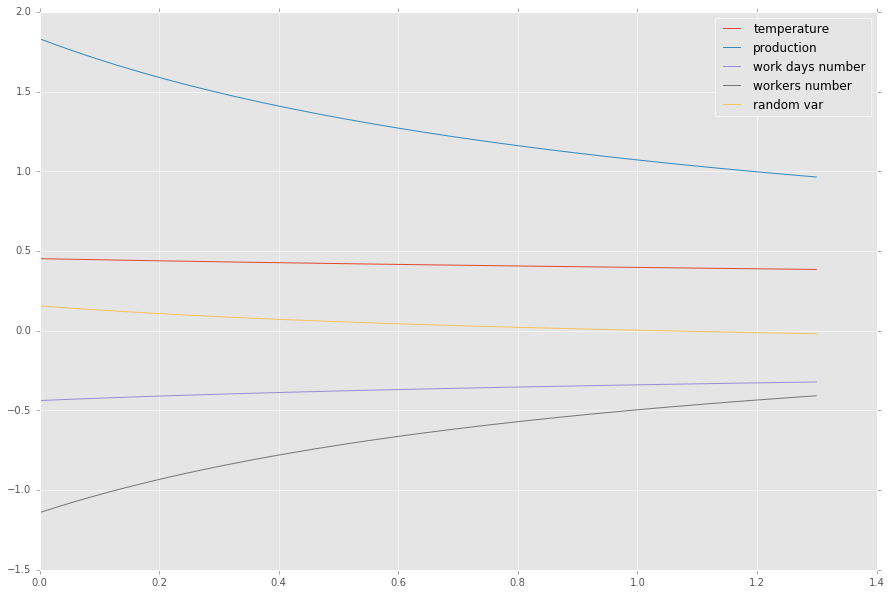

In [7]:
plt.plot(lmbd, values[0], label = "temperature")
plt.plot(lmbd, values[1], label = "production")
plt.plot(lmbd, values[2], label = "work days number")
plt.plot(lmbd, values[3], label = "workers number")
plt.plot(lmbd, values[4], label = "random var")
plt.legend()
plt.show()

Исходя из графика выше можно предположить, что нужно брать параметр регуляризации равный примерно 1.032,так как при таком его значении величина x5, которая не несет никакой информации, не учитывается.

In [8]:
lmbd[np.argmin(np.abs(values[4]))]

1.032

In [9]:
def norm(l):
    X_ = np.delete(X, 4, 1)
    y_ = y
    X5_dot_v5 = X_.dot(ridge_regression(l, X_, y_))
    return np.sqrt(np.sum((y_ - X5_dot_v5) ** 2))
norm_lmbd = [norm(l) for l in lmbd]

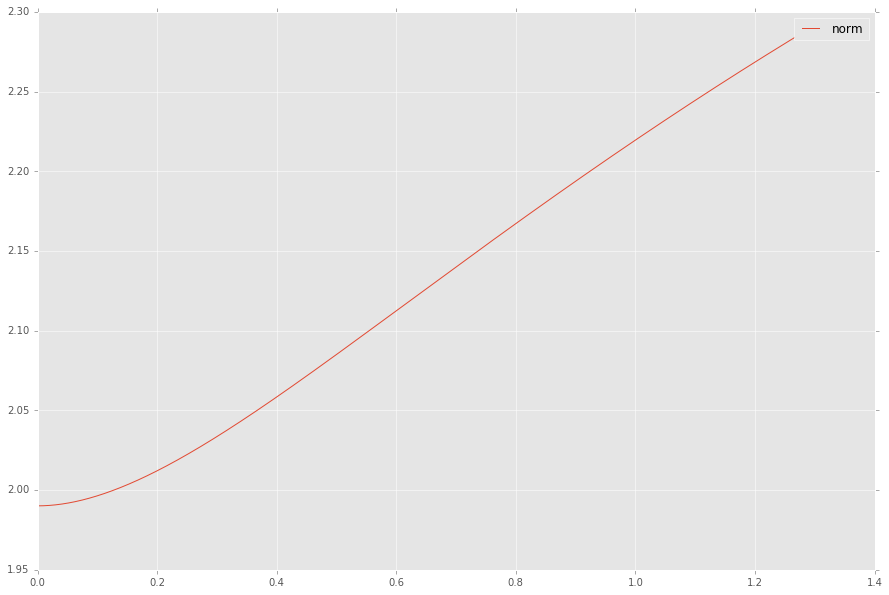

In [10]:
plt.plot(lmbd, norm_lmbd, label = "norm")
plt.legend()
plt.show()

На этом графике видно, что с ростом параметра регуляризации, растет и ошибка, даже на обучении.

In [11]:
def cv_ridge_regression(lmbd, X, y):
    cv = 0.
    for i in range(X.shape[0]):
        X_ = np.delete(X, i, 0)
        y_ = np.delete(y, i, 0)
        v = np.linalg.inv(X_.T.dot(X_)+ lmbd*np.eye(X_.shape[1])).dot(X_.T).dot(y_)
        cv += (X[i].dot(v) - y[i]) ** 2
    return cv/float(X.shape[0])

In [12]:
cv_lmbd = [cv_ridge_regression(l, X, y) for l in lmbd]

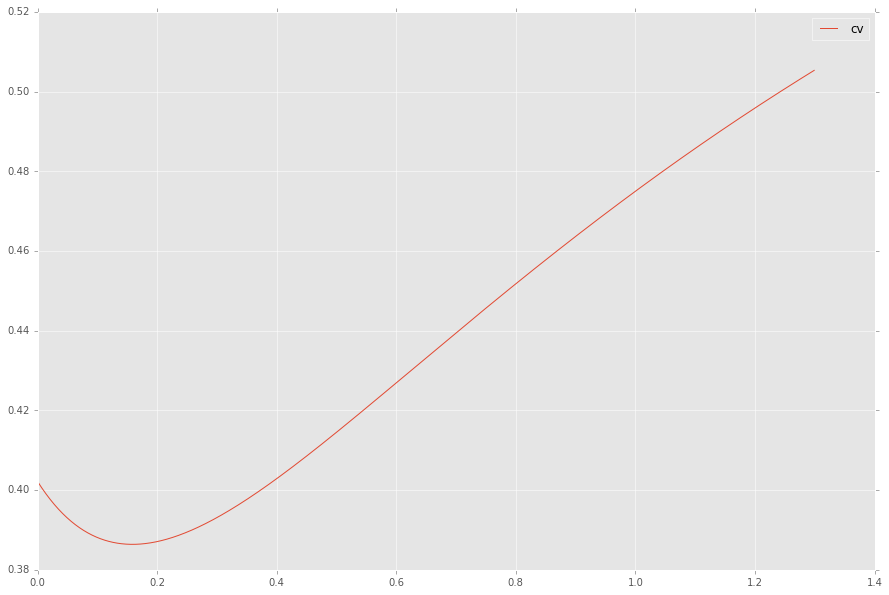

In [13]:
plt.plot(lmbd, cv_lmbd, label = "cv")
plt.legend()
plt.show()

Если сделать cross-validation на этих данных для каждого параметра регуляризации из диапозона, то можно видеть, что его следует брать равным 0.159, что сильно отличается от предположения сделанного при построении графика для каждой из координат вектора v.

In [14]:
lmbd[np.argmin(cv_lmbd)]

0.159